In [53]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import scipy.integrate as sci
import scipy as spy
import scipy.sparse as sparse
from numpy.linalg import solve
from scipy.sparse.linalg import spsolve
from scipy import interpolate
from scipy.integrate import odeint
from scipy.optimize import root

In [54]:
omega0 = 3
alpha = 0.1
theta0 = np.pi/4
#v0 = 6
v0 = 0.5
duree = 10

In [55]:
def F(X,t) :
    return np.array([ X[1], -alpha*X[1] -omega0**2*np.sin(X[0]) ])

#def Flin(X,t) :
 #   return np.array([ X[1], -alpha*X[1] -omega0**2*X[0] ])


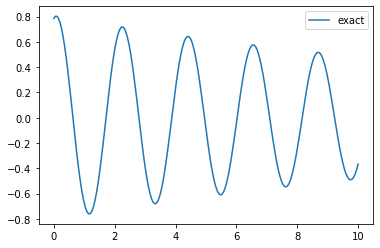

In [56]:
Xini = np.array([theta0,v0])

Temps = np.linspace(0,duree,200)

R = odeint(F,Xini,Temps)
#Rlin = odeint(Flin,Xini,Temps)
plt.plot(Temps,R[:,0],label = "exact")
#plt.plot(Temps,Rlin[:,0],label = "lineaire")
plt.legend()

In [57]:
def EulerExpl(F,nbpas,duree,theta0,v0) :
    dt = duree/nbpas
    X = np.zeros( (nbpas+1,2) )
    Temps = np.linspace(0,duree,nbpas+1)
    X[0] = [theta0,v0] 
    for n in range(nbpas) :
        X[n+1] = X[n] + dt*F(X[n],Temps[n]) # schéma 
    return X,Temps

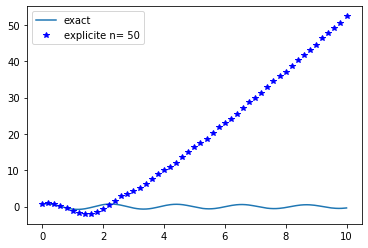

In [58]:
Nbpoints = 50
R1,Temps1 = EulerExpl(F,Nbpoints,duree,theta0,v0)
plt.plot(Temps,R[:,0],label = "exact")
plt.plot(Temps1,R1[:,0],"b*",label = "explicite n= {:d}".format(Nbpoints))
plt.legend()

In [59]:
def EulerImpl(nbpas) :
    dt = duree/nbpas
    X = np.zeros( (nbpas+1,2) )
    Temps = np.linspace(0,duree,nbpas+1)
    X[0] = [theta0,v0] 
    for n in range(nbpas) :
        def h(V) : return X[n] + dt*F(V,Temps[n+1]) - V
        X[n+1] = root(h,X[n]).x 
    return X,Temps

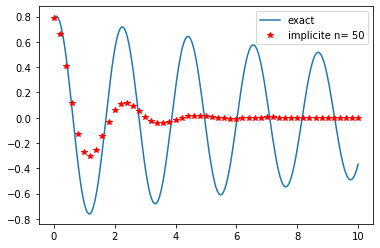

In [60]:
R2,Temps2 = EulerImpl(Nbpoints)
plt.plot(Temps,R[:,0],label = "exact")
plt.plot(Temps2,R2[:,0],"r*",label = "implicite n= {:d}".format(Nbpoints))
plt.legend()

In [61]:
def RungeKutta4(nbpas) :
    dt = duree/nbpas
    X = np.zeros( (nbpas+1,2) )
    Temps = np.linspace(0,duree,nbpas+1)
    X[0] = [theta0,v0] 
    for n in range(nbpas) :
        tn,tnp1 = Temps[n],Temps[n+1]
        Xn = X[n]
        K1 = dt*F(Xn,tn)
        K2 = dt*F(Xn+K1/2,tn+dt/2)
        K3 = dt*F(Xn+K2/2,tn+dt/2)
        K4 = dt*F(Xn+K3,tnp1)
        X[n+1] = Xn + ( K1 + 2*K2 + 2*K3 + K4 )/6
    return X,Temps

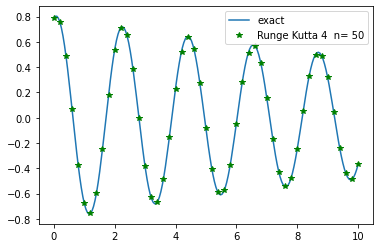

In [62]:
R3,Temps3 = RungeKutta4(Nbpoints)
plt.plot(Temps,R[:,0],label = "exact")
plt.plot(Temps3,R3[:,0],"g*",label = "Runge Kutta 4  n= {:d}".format(Nbpoints))
plt.legend()